 ### Importing important libraries

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn
import datetime as dt
import warnings

%matplotlib inline
sns.set_style('darkgrid')

### Loading the dataset

In [207]:
df = pd.read_csv("C:/Users/admin/Desktop/EDA assignment/takehome_users.csv")
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [208]:
df.shape

(12000, 10)

#### Checking for missing values

In [209]:
##Chcking missing values percentage
df.isnull().sum()/df.shape[0]*100

object_id                      0.000
creation_time                  0.000
name                           0.000
email                          0.000
creation_source                0.000
last_session_creation_time    26.475
opted_in_to_mailing_list       0.000
enabled_for_marketing_drip     0.000
org_id                         0.000
invited_by_user_id            46.525
dtype: float64

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


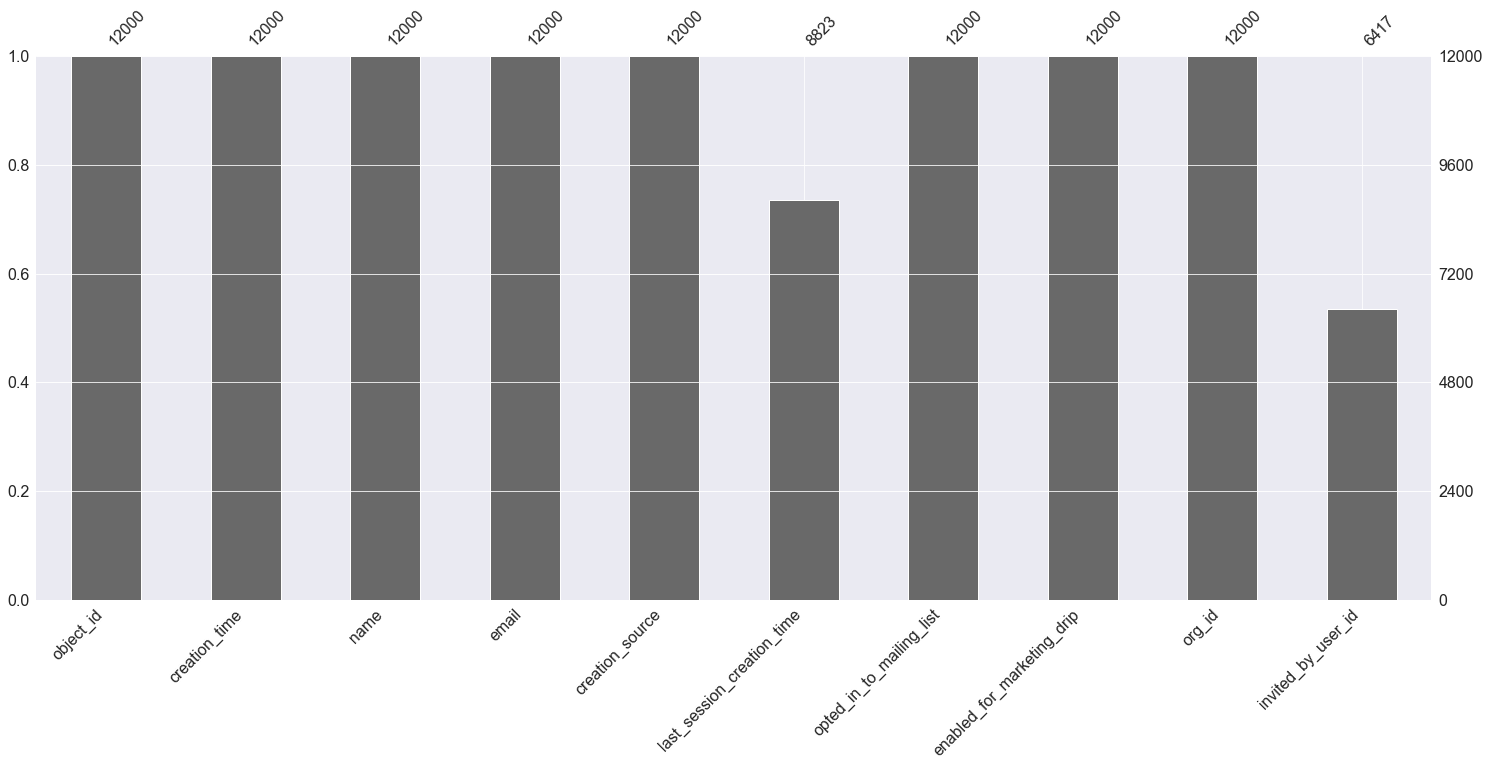

In [211]:
msn.bar(df);

<AxesSubplot:>

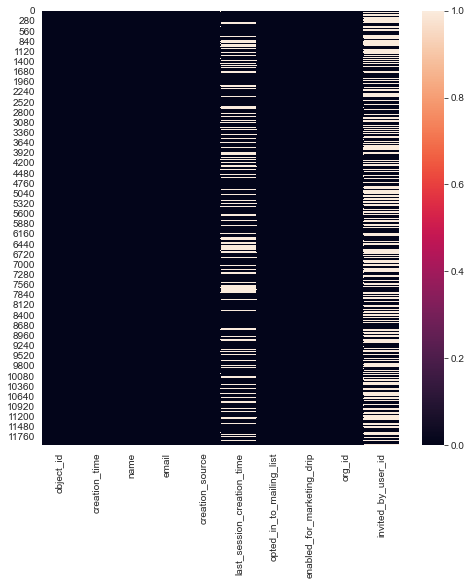

In [212]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

As we can see columns last_session_creation_time and invited_by_user_id has 26.47% & invited_by_user_id 46.52% values are missing

We will fill the missing values by 0

In [213]:
df1 = df.replace(np.nan,0)

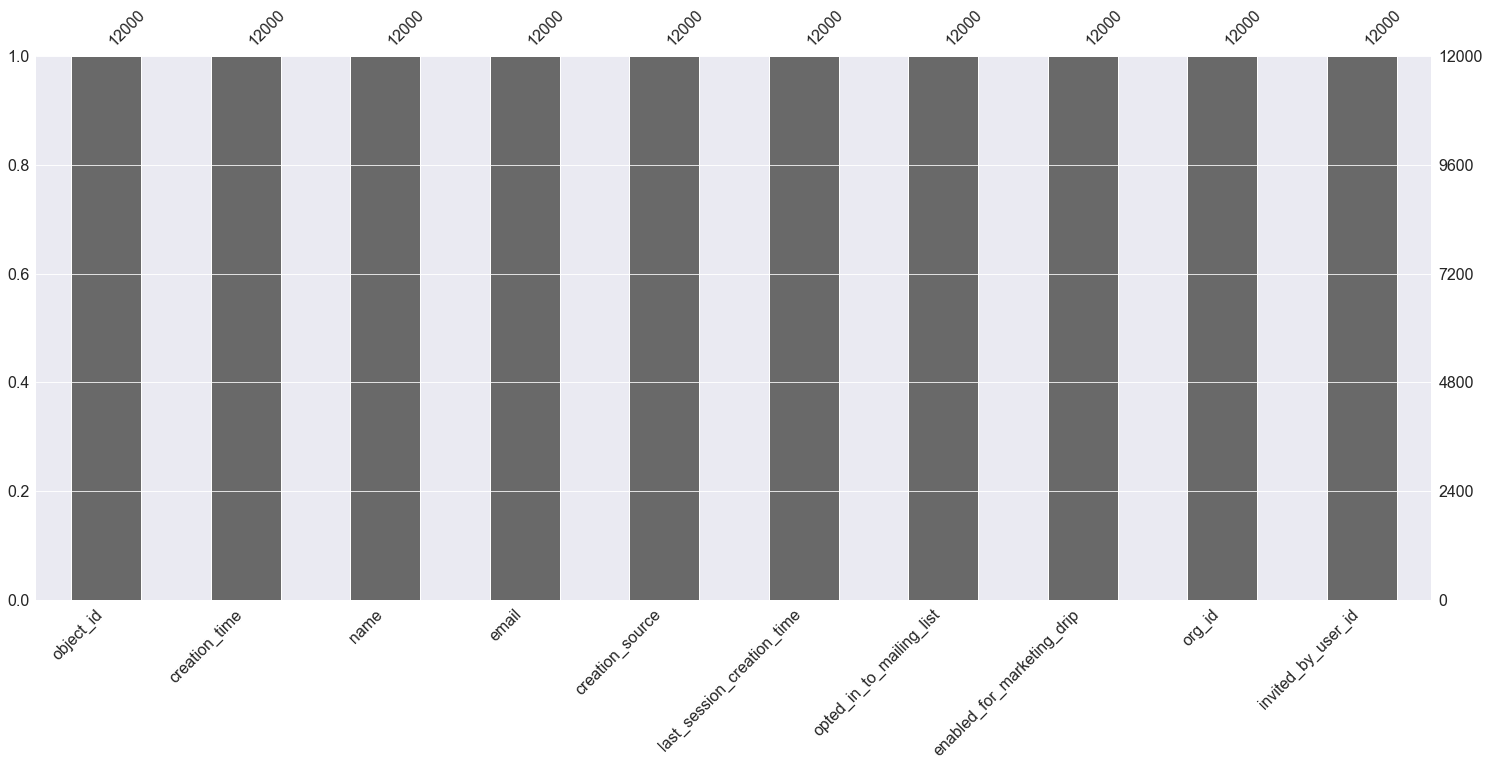

In [214]:
msn.bar(df1);

<Figure size 360x360 with 0 Axes>

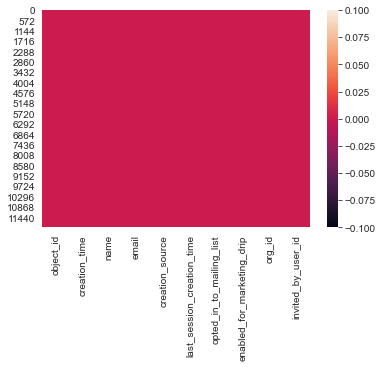

<Figure size 360x360 with 0 Axes>

In [215]:
sns.heatmap(df1.isnull())
plt.figure(figsize=(5,5))
## we can see the figure our data is free from missing values

In [216]:
# convert the creation_time data type from object to datetime
df1.creation_time = pd.to_datetime(df1['creation_time'])

In [217]:
# Extract year and month
df1['year'] = df1['creation_time'].dt.year
df1['month'] = df1.creation_time.dt.month
df1.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1


#### finding corelations in datset

In [218]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
count,12000.00000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,1.014115e+09,0.249500,0.149333,141.884583,3188.691333,2013.060833,6.250833
std,3464.24595,6.087938e+08,0.432742,0.356432,124.056723,3869.027693,0.723424,3.423968
min,1.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,3000.75000,0.000000e+00,0.000000,0.000000,29.000000,0.000000,2013.000000,3.000000
50%,6000.50000,1.368880e+09,0.000000,0.000000,108.000000,875.000000,2013.000000,6.000000
75%,9000.25000,1.393729e+09,0.000000,0.000000,238.250000,6317.000000,2014.000000,9.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,2014.000000,12.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'object_id'),
  Text(1.5, 0, 'last_session_creation_time'),
  Text(2.5, 0, 'opted_in_to_mailing_list'),
  Text(3.5, 0, 'enabled_for_marketing_drip'),
  Text(4.5, 0, 'org_id'),
  Text(5.5, 0, 'invited_by_user_id')])

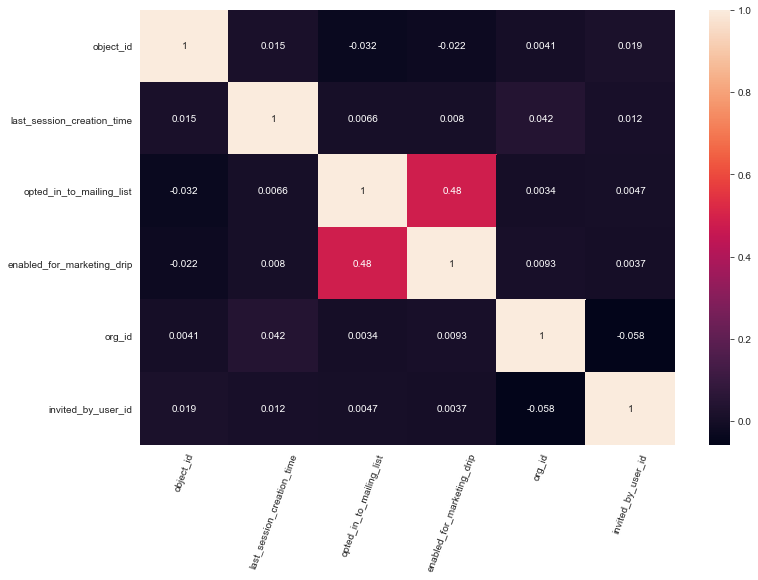

In [219]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation= 70)

In [220]:
df1.year.unique()

array([2014, 2013, 2012], dtype=int64)

In [221]:
df1.keys()

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'year',
       'month'],
      dtype='object')

<ipython-input-222-62c0e6e5b35f>:4: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



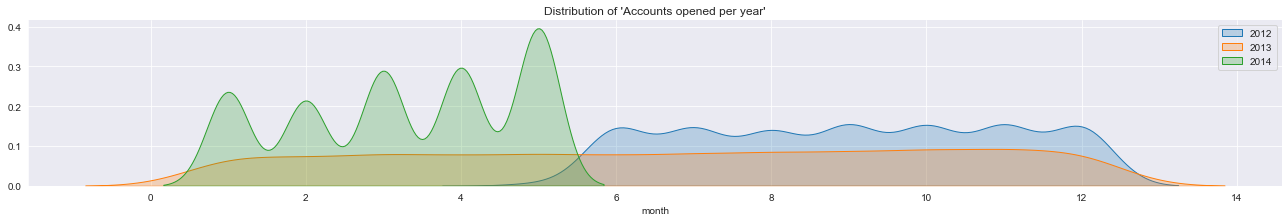

In [222]:
# Distribution of 'Accounts opened per year'
sns.FacetGrid(df1, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Accounts opened per year'")
plt.legend('year',labels=[2012, 2013, 2014])
plt.show()

Find user attainment over the years


In [223]:
df1.year.count()

12000

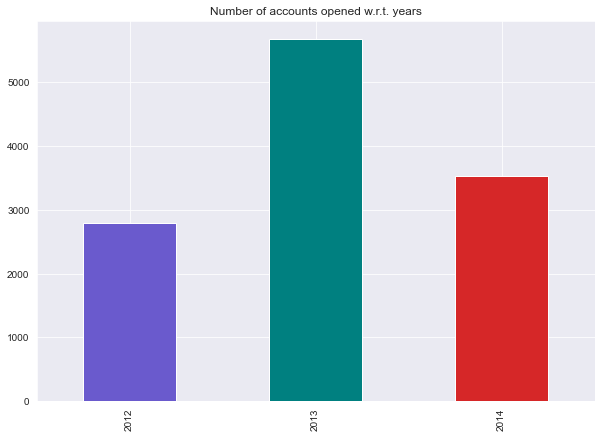

In [224]:
# Distribution of account opening w.r.t. years
df1.year.value_counts(sort=False).plot(kind='bar', color=['slateblue','teal','tab:red'], figsize=(10,7))
plt.title('Number of accounts opened w.r.t. years')
plt.show()

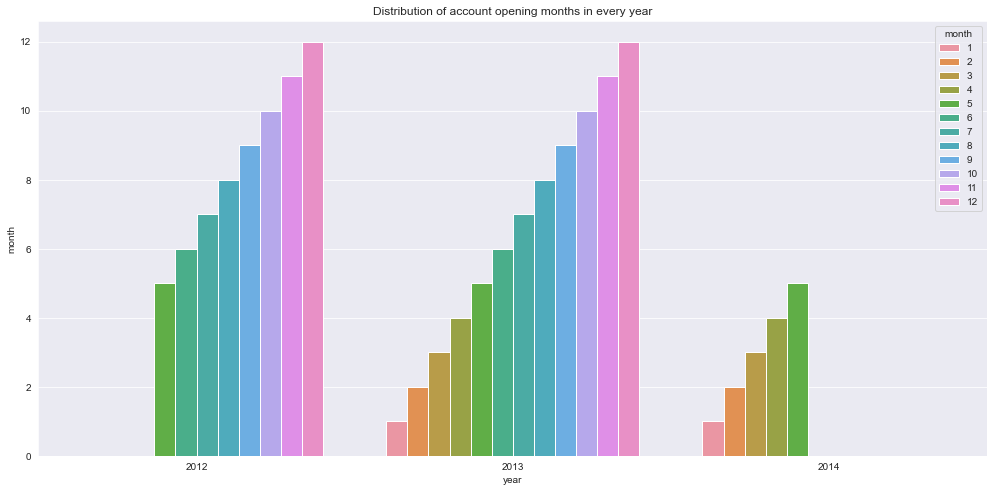

In [225]:
#plotting distribution of accounts opening in each year

plt.figure(figsize=(17,8))
sns.barplot(x='year', y='month',hue ='month',data=df1)

plt.title('Distribution of account opening months in every year')
plt.show()

#### Year 2012 analysis

In [226]:
df_12 = df1.loc[df1.year==2012]

In [227]:
df_12.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,2012,12
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,0.0,2012,10
22,23,2012-08-17 08:30:27,Souza Alice,AliceAraujoSouza@gustr.com,ORG_INVITE,1.345279e+09,1,0,6,23.0,2012,8
36,37,2012-09-25 14:37:23,Carr-Glyn Ella,EllaCarr-Glyn@yahoo.com,SIGNUP,1.348670e+09,0,0,276,0.0,2012,9
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,0.0,2012,11


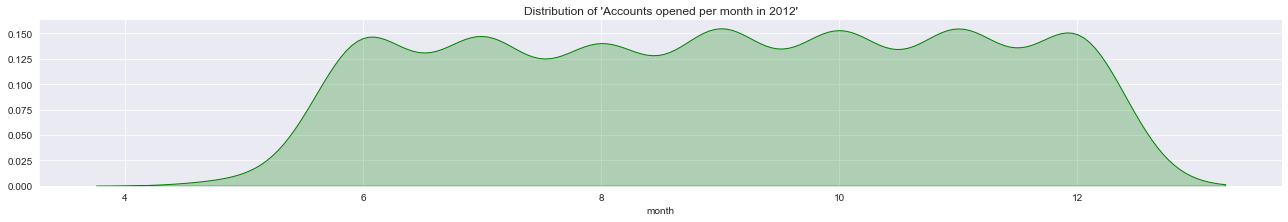

In [228]:
# Accounts opening in 2012 per month
sns.FacetGrid(df_12, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True,color='green')
plt.title("Distribution of 'Accounts opened per month in 2012'")
plt.show()

In [229]:
avg_2012 = df_12.month.value_counts().to_frame().reset_index()
avg_2012.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)
avg_2012['percentage'] = avg_2012.total_accounts_opened/df_12.shape[0] * 100

avg_2012

,month,total_accounts_opened,percentage
0,12,412,14.730068
1,9,409,14.622810
2,11,406,14.515552
3,6,401,14.336789
4,10,401,14.336789
5,7,387,13.836253
6,8,365,13.049696
7,5,16,0.572041


In [230]:
# Avg customer acquired per month in 2012
avgAcquisition2012 = avg_2012.percentage.sum()/avg_2012.month.nunique()
avgAcquisition2012

12.5

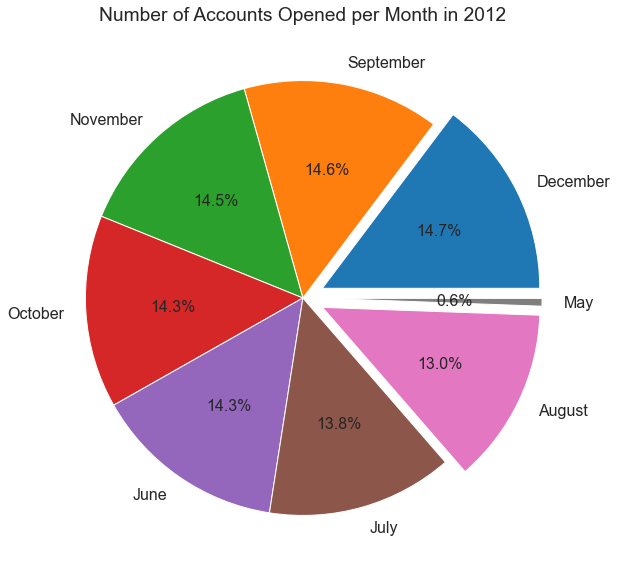

In [231]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size']=16
label = ['December', 'September', 'November','October', 'June', 'July', 'August', 'May']
df_12.month.value_counts().plot(kind='pie', labels=label, autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0.1, 0.1))
plt.ylabel('')
plt.title('Number of Accounts Opened per Month in 2012')
plt.show()

#### Year 2013 analysis

In [232]:
df_13 = df1.loc[df1.year==2013]
df_13.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12


Text(0.5, 1.0, 'Distribution of accounts opened per month')

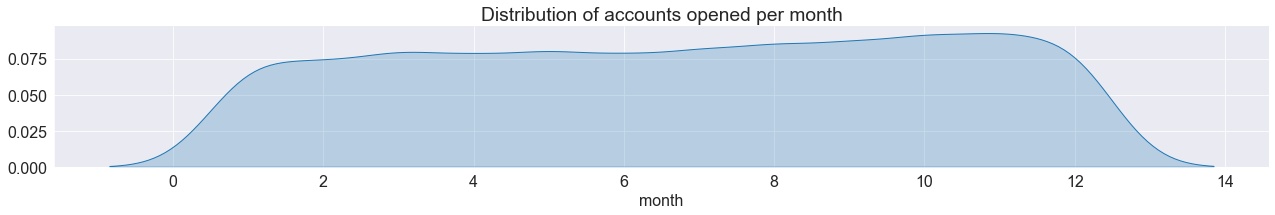

In [233]:
# Accounts opened per month in 2013
sns.FacetGrid(df_13, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of accounts opened per month")

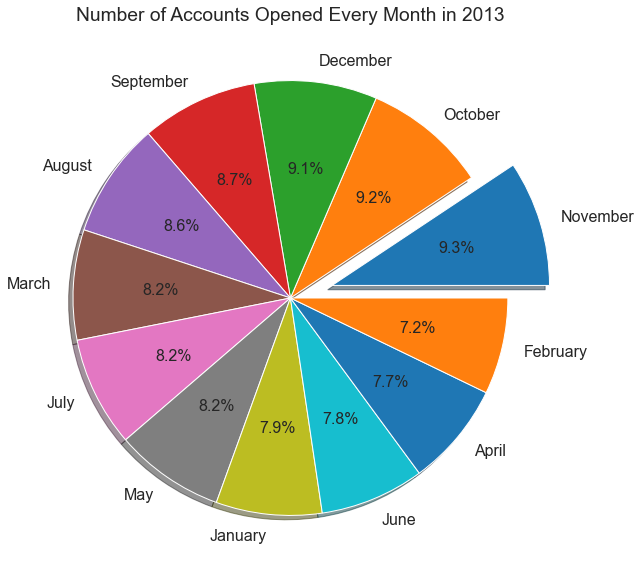

In [234]:
plt.figure(figsize=(10,10))
label = ['November', 'October', 'December', 'September', 'August', 'March', 'July', 'May', 'January', 'June', 'April', 'February']
df_13.month.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.2, 0, 0, 0, 0,0,0,0,0,0,0,0), shadow=True, labels=label)
plt.title('Number of Accounts Opened Every Month in 2013')
plt.ylabel('')
plt.show()

In [235]:
avg2013 = df_13.month.value_counts(sort=False).to_frame().reset_index()
avg2013.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)

avg2013['percentage'] = (avg2013.total_accounts_opened/df_13.shape[0]) * 100

avg2013

,month,total_accounts_opened,percentage
0,4,439,7.734320
1,8,487,8.579986
2,12,518,9.126145
3,1,447,7.875264
4,5,463,8.157153
5,9,492,8.668076
6,2,407,7.170543
7,6,440,7.751938
8,10,523,9.214235
9,3,465,8.192389


Text(0.5, 1.0, 'Accounts opened in year2013')

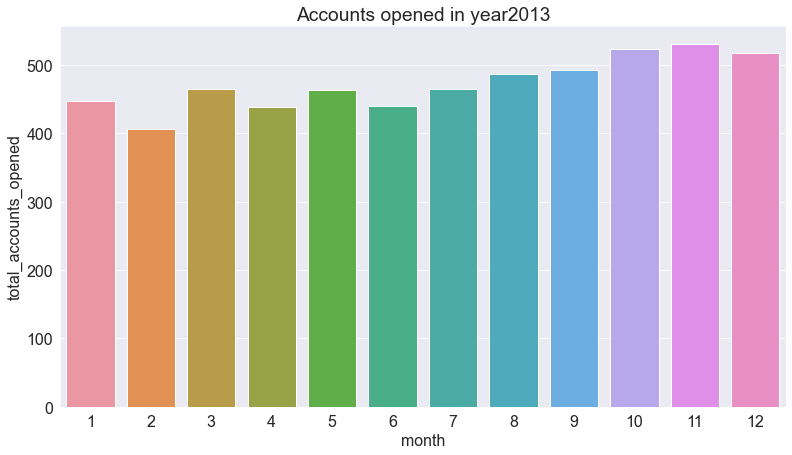

In [236]:
plt.figure(figsize=(13,7))

fig = sns.barplot(
    data = avg2013,
    x='month',
    y='total_accounts_opened',
   
    
)
plt.title("Accounts opened in year2013")


In [237]:
# Avg customer acquisition per month in 2013 
avgCustomerAcquisition2013 = avg2013.percentage.sum()/avg2013.month.nunique()
avgCustomerAcquisition2013.round(2)

8.33

#### Year: 2014

In [238]:

# Accounts opened in 2014
df_2014 = df1.loc[df1.year==2014]

df_2014


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
11,12,2014-04-17 23:48:38,Mathiesen L�rke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,0.000000e+00,0,0,130,9270.0,2014,4
12,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0,2014,3
16,17,2014-04-09 14:39:38,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,1.397314e+09,1,0,175,1600.0,2014,4
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,0.0,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11987,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,0.0,2014,3
11990,11991,2014-04-20 14:22:45,Vaughn Arthur,ArthurJVaughn@gmail.com,SIGNUP_GOOGLE_AUTH,1.401460e+09,0,0,388,0.0,2014,4
11991,11992,2014-04-09 19:39:56,Hermansen Amanda,AmandaAHermansen@yahoo.com,PERSONAL_PROJECTS,1.397245e+09,0,0,129,0.0,2014,4
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014,4


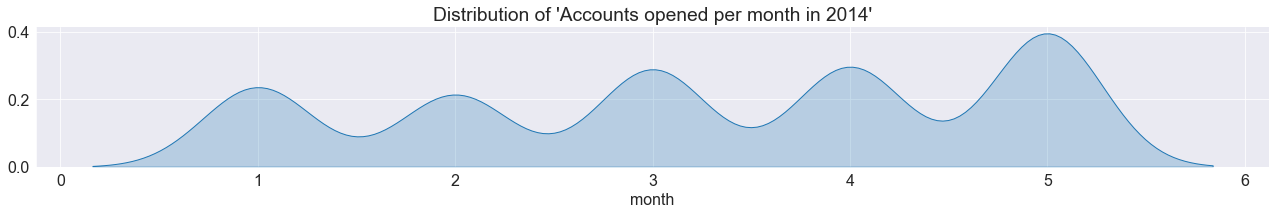

In [239]:
# Distribution of 'Accounts opened per month in 2014'
sns.FacetGrid(df_2014, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Accounts opened per month in 2014'")
plt.show()

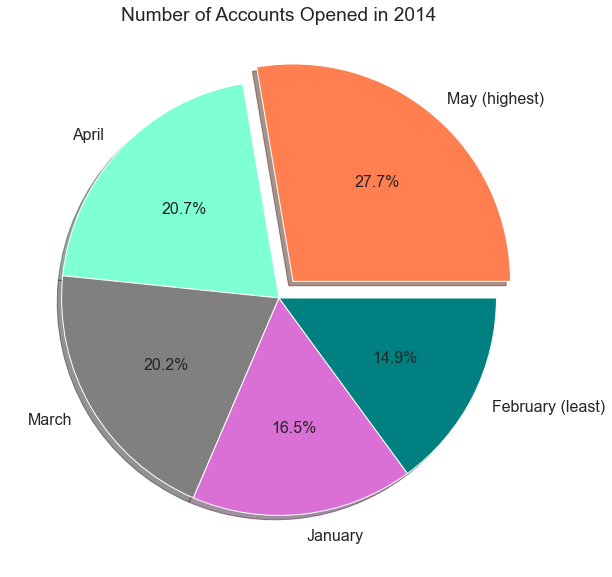

In [240]:
plt.figure(figsize=(10,10))
label = ['May (highest)', 'April', 'March', 'January', 'February (least)']
color = 'coral','aquamarine','grey','orchid','teal'
df_2014.month.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.1, 0, 0, 0,0), shadow=True, labels=label,colors=color)
plt.title('Number of Accounts Opened in 2014')
plt.ylabel('')
plt.show()

In [241]:
# Average accounts opened in 2014 per month
avg2014 = df_2014.month.value_counts(sort=False).to_frame().reset_index()
avg2014.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)
avg2014['percentage'] = avg2014.total_accounts_opened/df_2014.shape[0] * 100

avg2014

,month,total_accounts_opened,percentage
0,2,527,14.941877
1,4,730,20.697477
2,1,582,16.501276
3,3,712,20.187128
4,5,976,27.672243


In [242]:
# Avg accounts opened in 2014
avgAcquisition2014 = avg2014.percentage.sum()/avg2014.month.nunique()
avgAcquisition2014

20.0

In [243]:
# Total average accounts opened per month and per year 
total_avg = pd.DataFrame({
    'year':[2012, 2013, 2014],
    'avg_accounts_opened_per_month':[round(avgAcquisition2012,2), round(avgCustomerAcquisition2013,2), round(avgAcquisition2014,2)],
    'avg_accounts_opened_per_year':[round((df_12.shape[0]/df1.shape[0]*100),2), round((df_13.shape[0]/df1.shape[0] * 100),2), round((df_2014.shape[0]/df1.shape[0] * 100),2)]
})

total_avg

,year,avg_accounts_opened_per_month,avg_accounts_opened_per_year
0,2012,12.50,23.31
1,2013,8.33,47.30
2,2014,20.00,29.39


In [244]:
# Average accounts opened per month
fig = px.bar(
    total_avg,
    x='year',
    y=['avg_accounts_opened_per_month', 'avg_accounts_opened_per_year'],
    text_auto=True,
    title='Average Account Opened in Every Year',
    template='ggplot2'
)
fig.update_layout(
    height=600,
    width=900,
    title=dict(
        x=0.08,
        y=0.95,
        font= dict(
            size=30,
            family='Time New Roman'
        )
    )
)

fig.show()

In [245]:
#month_wise growth
month_wise = df1.groupby(['year','month']).month.count().reset_index(name='total')
month_wise

,year,month,total
0,2012,5,16
1,2012,6,401
2,2012,7,387
3,2012,8,365
4,2012,9,409
5,2012,10,401
6,2012,11,406
7,2012,12,412
8,2013,1,447
9,2013,2,407


In [246]:
# Overall growth
mom = month_wise.loc[(month_wise.year==2014) & (month_wise.month==5)]['total']/month_wise.drop(24,axis=0).total.values.sum() * 100
mom.round(3)

24    8.853
Name: total, dtype: float64

In [247]:
#user vs creation sourse
df1.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,2012,12
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,2013,7
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0,2013,11
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1


In [248]:
# Percentage of users opened an account through invitation
df1.invited_by_user_id.isna().sum()/df1.shape[0] * 100

0.0

In [249]:
# Types of invitation
account_opening_reasons =df1.creation_source.value_counts().to_frame().reset_index()
account_opening_reasons.rename(columns={'creation_source':'total', 'index':'creation_source'}, inplace=True)
account_opening_reasons['percentage'] = np.round(account_opening_reasons.total/df1.shape[0]*100,2)
account_opening_reasons

,creation_source,total,percentage
0,ORG_INVITE,4254,35.45
1,GUEST_INVITE,2163,18.02
2,PERSONAL_PROJECTS,2111,17.59
3,SIGNUP,2087,17.39
4,SIGNUP_GOOGLE_AUTH,1385,11.54


In [250]:
fig = px.bar(
    account_opening_reasons,
    x='creation_source',
    y='total',
    title='Account Opening Type w.r.t. Creation Source',
    text_auto=True,
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    height=600,
    width=1000,
    title=dict(
        font=dict(
            size=30,
            family='Time New Roman'
        )
    )
)

fig.show()

In [251]:
account_opening_reasons.creation_source.to_list()

['ORG_INVITE',
 'GUEST_INVITE',
 'PERSONAL_PROJECTS',
 'SIGNUP',
 'SIGNUP_GOOGLE_AUTH']

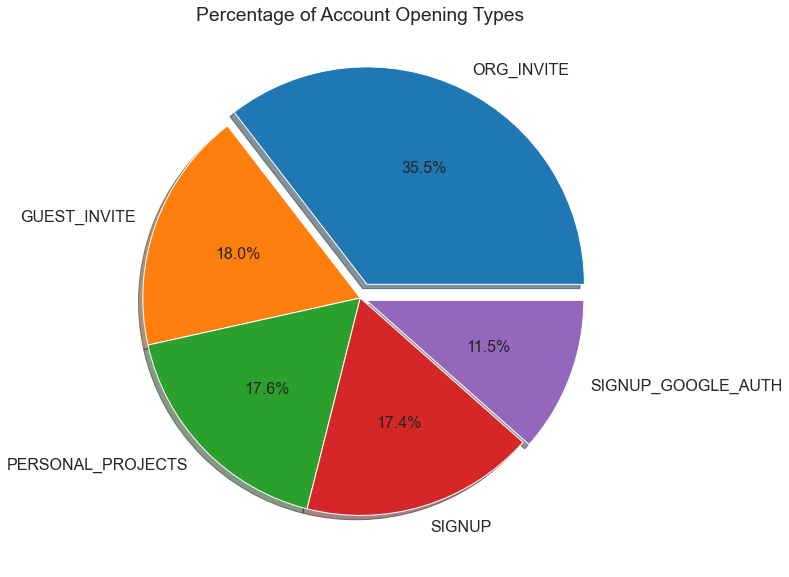

In [252]:
plt.figure(figsize=(10,10))
account_opening_reasons.percentage.plot(kind='pie', autopct='%1.1f%%', labels=account_opening_reasons.creation_source.to_list(), explode=(.07, 0, 0, 0, 0.03), shadow=True)
plt.ylabel('')
plt.title('Percentage of Account Opening Types')
plt.show()

### Classify users based on obtaining for promotional email and on regular product drip


In [253]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'year',
       'month'],
      dtype='object')

In [254]:
mailing_list = df1.opted_in_to_mailing_list.value_counts().to_frame().reset_index()
mailing_list.rename(columns={'opted_in_to_mailing_list':'total', 'index':'opted_in_to_mailing_list'}, inplace=True)
mailing_list.opted_in_to_mailing_list.replace({0:'Not-Opted',1:'Opted'}, inplace=True)
mailing_list['percentage'] = round(mailing_list.total / df1.shape[0] * 100, 2)
mailing_list




,opted_in_to_mailing_list,total,percentage
0,Not-Opted,9006,75.05
1,Opted,2994,24.95


In [255]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=mailing_list.opted_in_to_mailing_list,
    y=mailing_list.total,
)])

fig.update_traces(
    text=mailing_list.total, 
    textposition='inside', 
    marker_color=['red', 'green']
)

fig.update_layout(title_text='Number of Consumers opted for mailing list', width=500, height=500, title_font={'family':'Time New Roman', 'size':24})
fig.show()

In [256]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'year',
       'month'],
      dtype='object')

In [257]:
email_opted = df1[df1.opted_in_to_mailing_list==1]
email_opted.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,2013,7
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1
16,17,2014-04-09 14:39:38,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,1.397314e+09,1,0,175,1600.0,2014,4
18,19,2013-05-24 14:56:36,Collins Arlene,ArleneRCollins@gmail.com,SIGNUP,1.369926e+09,1,0,0,0.0,2013,5


#### Users enabled for marketing drip

In [258]:
# Users enabled for marketing drip
df1.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [259]:
# percentage of users enabled regular marketing drip
round(df1.enabled_for_marketing_drip.value_counts()[1] / df1.shape[0] * 100, 2)

14.93

In [260]:
# Users opted for mailing list and enabled marketing drip
email_opted.enabled_for_marketing_drip.value_counts()

0    1652
1    1342
Name: enabled_for_marketing_drip, dtype: int64

In [261]:
# percentage of users enabled for marketing drip who had also opted to receive promotional mail
round(email_opted.enabled_for_marketing_drip.value_counts()[1] / email_opted.shape[0] * 100, 2)

44.82

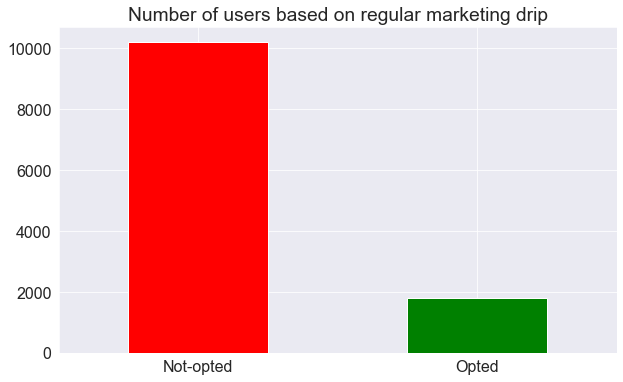

In [262]:
fig = plt.figure(figsize=(10,6))
df1.enabled_for_marketing_drip.value_counts().plot(kind='bar', color=['r','g'])
plt.xticks([0,1],['Not-opted', 'Opted'], rotation=0)
plt.title('Number of users based on regular marketing drip')
plt.show()

In [263]:
# Is the column 'org_id' has null value?
df1.org_id.isna().sum()

0

In [264]:
# total number of org-ids 
df1.org_id.nunique() -1 # -1 for 0

416

In [265]:
# organization Id
df1.org_id.value_counts().sort_values(ascending=False).head(11)[1:]

1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
Name: org_id, dtype: int64

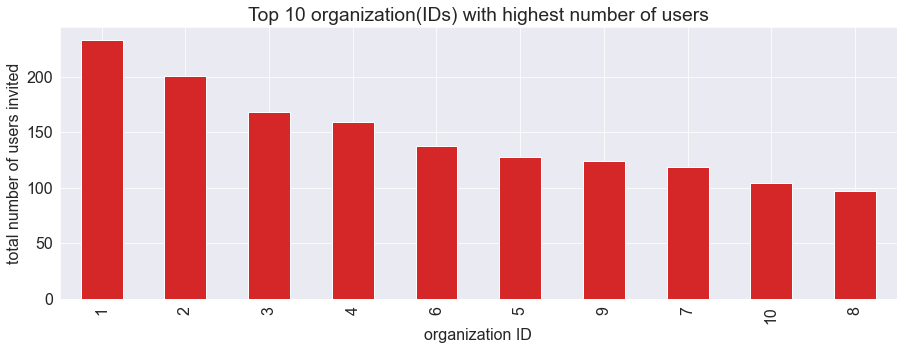

In [266]:
df1.org_id.value_counts().sort_values(ascending=False)[1:11].plot(kind='bar', figsize=(15,5), color='tab:red')
plt.xlabel('organization ID')
plt.ylabel('total number of users invited')
plt.title("Top 10 organization(IDs) with highest number of users");

In [267]:
# Number of non-invited users
df1.org_id.value_counts()[0]

319

### Invited by user id

In [268]:
df1.head(15)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,2012,12
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,2013,7
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0,2013,11
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1


In [269]:
df1.invited_by_user_id = df1.invited_by_user_id.astype(np.float).astype('int32', errors='ignore')

<ipython-input-269-bd309b6bf74b>:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [270]:
df1.invited_by_user_id.head()

0    10803
1      316
2     1525
3     5151
4     5240
Name: invited_by_user_id, dtype: int32

In [271]:
df1.invited_by_user_id.isna().any()

False

In [272]:
df1.invited_by_user_id.value_counts().head(15)

0        5583
10741      13
2527       12
2308       11
1525       11
11770      11
1175       10
4302       10
10481      10
4612       10
4803       10
10628      10
6370       10
7012       10
2354       10
Name: invited_by_user_id, dtype: int64

In [273]:
df1.loc[df1.object_id==2527]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
2526,2527,2012-06-18 02:45:04,Ribeiro Diego,DiegoRochaRibeiro@gustr.com,PERSONAL_PROJECTS,1.340420e+09,0,0,57,0,2012,6


In [294]:
df1.invited_by_user_id.value_counts().head(10)


0        5583
10741      13
2527       12
2308       11
1525       11
11770      11
1175       10
4302       10
10481      10
4612       10
Name: invited_by_user_id, dtype: int64

0         5583
10741      13
2527       12
2308       11
1525       11
11770      11
1175       10
4302       10
10481      10
4612       10

### Check for Users with multiple account

In [275]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'year',
       'month'],
      dtype='object')

In [276]:
# check duplicate
df1.duplicated().sum()

0

In [277]:
df1.duplicated('name').any()

True

In [278]:
df1.object_id.nunique()

12000

In [279]:
df1.name.nunique() # Total unique values in name column

11349

In [280]:
# Total duplicate values in name column 
df1.duplicated('name').sum()

651

In [281]:
duplicate = df1[df1.duplicated('name')]
duplicate

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
805,806,2013-10-14 17:03:01,Oliveira Jo�o,JoaoCorreiaOliveira@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,0,0,250,0,2013,10
867,868,2013-06-15 11:44:24,Azevedo Clara,ClaraAraujoAzevedo@jourrapide.com,PERSONAL_PROJECTS,0.000000e+00,0,0,278,0,2013,6
885,886,2013-11-10 12:34:07,Araujo Gabriela,GabrielaCorreiaAraujo@jourrapide.com,ORG_INVITE,1.384087e+09,0,0,54,4118,2013,11
917,918,2012-11-23 06:32:45,Araujo Gabriela,GabrielaDiasAraujo@cuvox.de,SIGNUP,1.353652e+09,1,0,40,0,2012,11
974,975,2012-08-17 08:11:56,Araujo Bianca,BiancaFerreiraAraujo@cuvox.de,GUEST_INVITE,1.345796e+09,1,1,179,7479,2012,8
...,...,...,...,...,...,...,...,...,...,...,...,...
11927,11928,2013-09-15 11:40:48,Gerber Johanna,JohannaGerber@yahoo.com,GUEST_INVITE,1.379764e+09,0,0,52,11973,2013,9
11931,11932,2014-01-18 07:28:55,Simonsen Jonathan,JonathanSSimonsen@gmail.com,GUEST_INVITE,1.390030e+09,0,0,181,5369,2014,1
11933,11934,2013-02-18 13:43:13,Castro Matheus,MatheusMeloCastro@hotmail.com,ORG_INVITE,1.361195e+09,1,1,292,4458,2013,2
11943,11944,2012-12-06 13:17:37,Bach Silas,SilasABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.354800e+09,0,0,411,0,2012,12


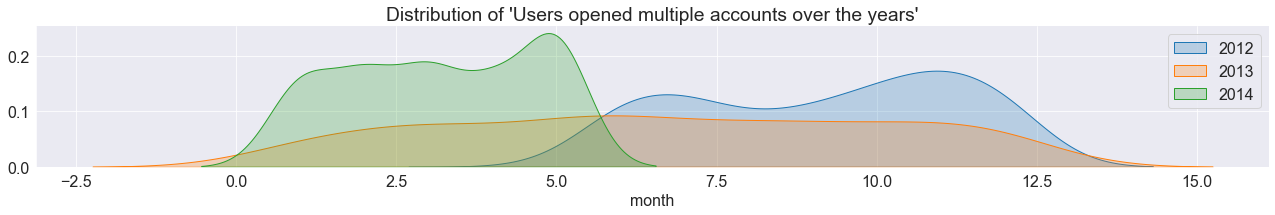

In [282]:
# Distribution of 'Accounts opened per month in 2014'
sns.FacetGrid(duplicate, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Users opened multiple accounts over the years'")
plt.legend(labels=[2012, 2013, 2014])
plt.show()

In [283]:
# Total unique values in the email column
df1.email.nunique()

11980

In [284]:
df1['time'] = df1.creation_time.dt.strftime('%H.%M')


In [285]:
df1['time']= df1.time.astype('float')


In [286]:
# save the dataframe
df1.to_csv('takehome_users_clean_1.csv')


## Insights from the Users Dataset

----
1. The users dataset contains 12000 unique user IDs that have been created in between May-2012 to May-2014.
2. User attainment has increased over the years with a mom growth rate of 8.53%. The correlation between last_session_creation_time vs year has a positive correlation of 0.73. 
3. Highest number of users were joined through organization invitation (35.45%), followed by guest invitation (18.02%), personal project(17.59%). The rest users were joined themselves by signing up 17.39% and through Google 11.54%.
4. Out of 12000 unique user IDs, only 2994 (24.95%) had opted to receive promotional emails, out of which 1342 (44.82%) had enabled for marketing drip. Where as, in general, total 1792 users (14.93% only) had enabled marketing drip.
5. There are 651 users with multiple user ID and 20 duplicate email IDs




